In [57]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [16]:
train_dataset = datasets.ImageFolder(root='./data/train/', transform=data_transform)

In [17]:
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

In [75]:
print type(train_dataset)
print type(dataset_loader)

<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [76]:
for i,(images,labels) in enumerate(dataset_loader):
    print type(images[0])
    print type(labels)
    if i==2:
        break

<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>
<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>
<class 'torch.FloatTensor'>
<class 'torch.LongTensor'>


In [64]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

['FIVE', 'FOUR', 'NONE', 'ONE', 'THREE', 'TWO']
FIVE


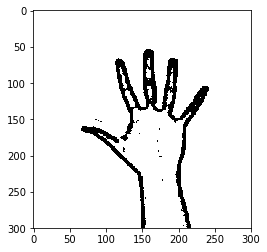

In [82]:
print train_dataset.classes
x,y = train_dataset[0] 
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(x))
print train_dataset.classes[y]

FOUR


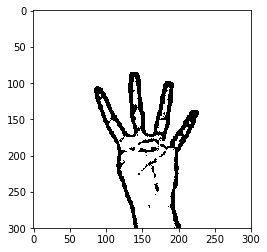

In [85]:
x,y = train_dataset[2222] 
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(x))
print train_dataset.classes[y]

In [77]:
for X, Y in dataset_loader:
    print X.shape, Y.shape
    break

torch.Size([128, 3, 300, 300]) torch.Size([128])


In [89]:
from torchsummary import summary
import torch 
import torch.nn as nn
from torch.autograd import Variable

In [104]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()

        #conv 1
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=2)
        self.relu1=nn.ReLU()

        #Maxpool 1
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        #conv 2
        self.cnn2=nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=2)
        self.relu2=nn.ReLU()

        #Maxpool 2
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        #conv 3
        self.cnn3=nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2)
        self.relu3=nn.ReLU()

        #Maxpool 3
        self.maxpool3=nn.MaxPool2d(kernel_size=2)

        #conv 4
        self.cnn4=nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=2)
        self.relu4=nn.ReLU()

        #Maxpool 4
        self.maxpool4=nn.MaxPool2d(kernel_size=2)

        # FC 1
        self.fc1=nn.Linear(128*20*20,512)
        self.relu5=nn.ReLU()
        
        #FC 2
        self.fc2=nn.Linear(512,6)

    def forward(self,x):
        ori=x[0][0].data.numpy()
        print 'original : ',ori.shape
        plt.imshow(ori, cmap=plt.get_cmap('gray'))
        plt.show(),
        #conv1
        out=self.cnn1(x)
        out=self.relu1(out)
        #print type(out)
        intm=out[0][0].data.numpy()
        print 'conv 1: ',intm.shape
        #imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        #max poo1 1
        out=self.maxpool1(out)
        ap=out[0][0].data.numpy()
        print 'maxpool 1 : ',ap.shape
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        #conv2
        out=self.cnn2(out)
        out=self.relu2(out)
        intm=out[0][0].data.numpy()
        print 'conv 2: ',intm.shape
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        #max poo1 2
        out=self.maxpool2(out)
        ap=out[0][0].data.numpy()
        print 'maxpool 2 : ',ap.shape
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show()
        
        #conv3
        out=self.cnn3(out)
        out=self.relu3(out)
        intm=out[0][0].data.numpy()
        print 'conv 2: ',intm.shape
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        #max poo1 3
        out=self.maxpool3(out)
        ap=out[0][0].data.numpy()
        print 'maxpool 2 : ',ap.shape
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show()
        
        #conv4
        out=self.cnn4(out)
        out=self.relu4(out)
        intm=out[0][0].data.numpy()
        print 'conv 2: ',intm.shape
        imgplot = plt.imshow(intm)
        plt.imshow(intm, cmap=plt.get_cmap('gray'))
        plt.show(),
        
        #max poo1 4
        out=self.maxpool4(out)
        ap=out[0][0].data.numpy()
        print 'maxpool 2 : ',ap.shape
        plt.imshow(ap, cmap=plt.get_cmap('gray'))
        plt.show()
        
        out=out.view(out.size(0),-1)
        
        #fc1
        out=self.relu5(self.fc1(out))
        
        #fc2
        out=self.fc2(out)
        
        return out

In [105]:
model=CNNModel()
criterion=nn.CrossEntropyLoss()
#learning_rate=0.01
optimizer=torch.optim.Adadelta(model.parameters())#,lr=learning_rate)

In [106]:
print model.parameters()

<generator object parameters at 0x7f58948eaaa0>


original :  (300, 300)


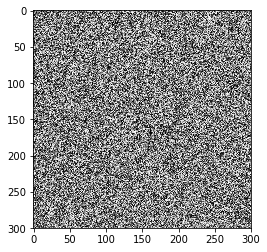

conv 1:  (302, 302)


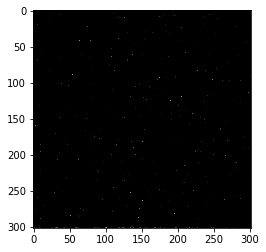

maxpool 1 :  (151, 151)


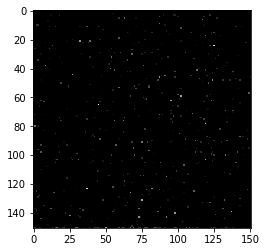

conv 2:  (153, 153)


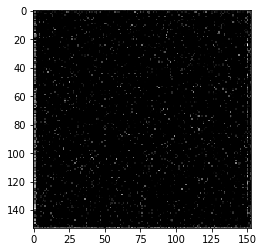

maxpool 2 :  (76, 76)


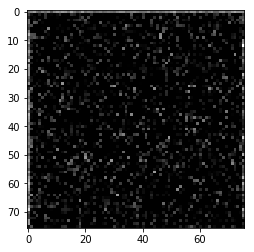

conv 2:  (78, 78)


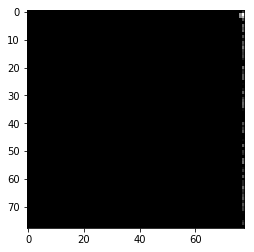

maxpool 2 :  (39, 39)


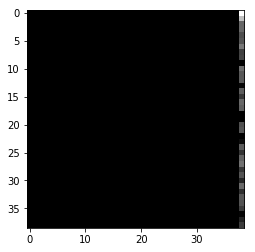

conv 2:  (41, 41)


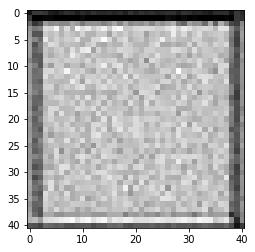

maxpool 2 :  (20, 20)


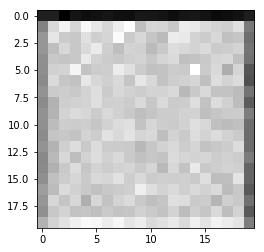

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1      [-1, 32L, 302L, 302L]             896
              ReLU-2      [-1, 32L, 302L, 302L]               0
         MaxPool2d-3      [-1, 32L, 151L, 151L]               0
            Conv2d-4      [-1, 64L, 153L, 153L]           18496
              ReLU-5      [-1, 64L, 153L, 153L]               0
         MaxPool2d-6        [-1, 64L, 76L, 76L]               0
            Conv2d-7       [-1, 128L, 78L, 78L]           73856
              ReLU-8       [-1, 128L, 78L, 78L]               0
         MaxPool2d-9       [-1, 128L, 39L, 39L]               0
           Conv2d-10       [-1, 128L, 41L, 41L]          147584
             ReLU-11       [-1, 128L, 41L, 41L]               0
        MaxPool2d-12       [-1, 128L, 20L, 20L]               0
           Linear-13                 [-1, 512L]        26214912
             ReLU-14                 [-

In [107]:
summary(model, (3, 300, 300))